<a href="https://colab.research.google.com/github/nicecarrot/AI-Study/blob/main/2day_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 주식 데이터 수집

  1. 종목 코드 가져오기
  2. 주식 데이터 가져오기
  3. 투자지표 가져오기

## 종목 코드 가져오기

1. KIND 사이트 접속 https://kind.krx.co.kr/
2. 상장법인상세정보 > 상장법인목록
3. 키보드 'F12' > 상단의 Network 메뉴 > Type은 All로 설정 
4. EXCEL 버튼 클릭하기  
5. 필요한 정보 : Header의 General메뉴의 Request URL과 From Data 메뉴의 method 가져오기
6. 완성된 URL : https://kind.krx.co.kr/corpgeneral/corpList.do?method=download
> * 여기서 명심할 점은 Request URL과 method 사이에 ?를 꼭 넣어줘야 함
> * From Data의 view source 전체를 가져와도 가능 

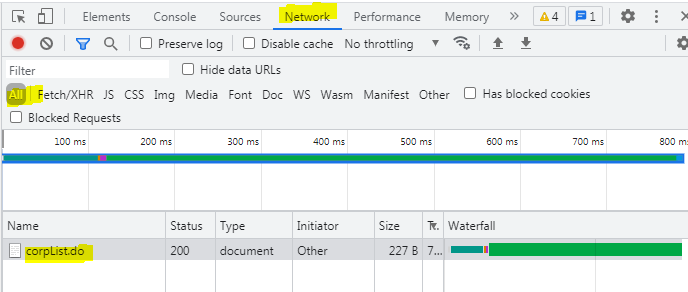

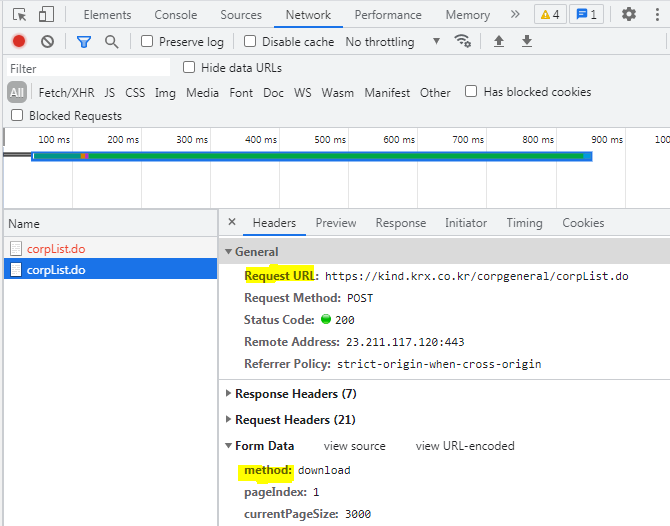

In [ ]:
# pandas 라이브러리 불러오기
import pandas as pd

* 상장법인목록 다운로드
* read_html 함수 :  html에 있는 table속성에 해당하는 값(웹페이지에 있는 표)을 불러오는 함수


In [ ]:
# read_html 함수 :  html에 있는 table속성에 해당하는 값(웹페이지에 있는 표)을 불러오는 함수
# 상장법인목록 다운로드 
# From Data의 method만 사용
stock_list = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

In [ ]:
stock_list

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,92220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...
2452,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2453,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
2454,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2455,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [ ]:
# From Data의 view source 사용
#stock_list = pd.read_html('https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&pageIndex=1&currentPageSize=3000&comAbbrv=&beginIndex=&orderMode=3&orderStat=D&isurCd=&repIsuSrtCd=&searchCodeType=&marketType=&searchType=13&industry=&fiscalYearEnd=all&comAbbrvTmp=&location=all', header=0)[0]

In [ ]:
#stock_list

In [ ]:
# 특정 변수인 '회사명', '종목코드' 추출
stock_code = stock_list[['회사명', '종목코드']]

In [ ]:
stock_code

,회사명,종목코드
0,DRB동일,4840
1,DSR,155660
2,GS글로벌,1250
3,HDC현대산업개발,294870
4,KEC,92220
...,...,...
2452,타임기술,318660
2453,툴젠,199800
2454,플럼라인생명과학,222670
2455,한국미라클피플사,331660


In [ ]:
# 변수명 변경
stock_code = stock_code.rename(columns={'회사명':'company', '종목코드':'code'})

In [ ]:
stock_code

,company,code
0,DRB동일,4840
1,DSR,155660
2,GS글로벌,1250
3,HDC현대산업개발,294870
4,KEC,92220
...,...,...
2452,타임기술,318660
2453,툴젠,199800
2454,플럼라인생명과학,222670
2455,한국미라클피플사,331660


In [ ]:
# code 4자리인 경우, 6자리 포멧으로 맞추기 
# map은 리스트의 요소를 지정된 함수로 처리해주는 함수 : list(map(함수, 리스트))
stock_code.code = stock_code.code.map('{:06d}'.format)

In [ ]:
stock_code

,company,code
0,DRB동일,004840
1,DSR,155660
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,KEC,092220
...,...,...
2452,타임기술,318660
2453,툴젠,199800
2454,플럼라인생명과학,222670
2455,한국미라클피플사,331660


## 주식 데이터 가져오기

* request를 이용하는 이유! 
> * pandas도 HTML 정보 가져올 수 있는데?
> * 디도스 공격등 여러 이유로 인해서 네이버에서 이런 코드로 사이트에 직접 접근하는 것을 막고 있음
> * 사람인 "척"을 해줘야 합니다. 즉, 브라우저를 이용해서 접근해야 합니다!
> * 이를 위해서, HTTP 클라이언트 라이브러리인 "request"를 사용합니다.

In [ ]:
# html에 요청을 보내는 라이브러리
import requests

In [ ]:
# 특정 회사의 종목 코드 불러오기
# stirp - 혹시 모를 공백 제거
company = '삼성전자'
code = stock_code[stock_code.company == company].code.values[0].strip()

In [ ]:
code

'005930'

In [ ]:
# user-agent 확인 사이트: http://www.useragentstring.com/
# user-agent란, 크롤링을 하다 보면 종종 페이지에서 아무것도 받아오지 못해서 막히는 경우가 생기는데 대부분 서버에서 봇을 차단하는 것이다. 
# 그래서 user agent를 header에 적어두면 접속이 잘 되는 걸 확인 할 수 있음
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'}

1. 네이버 금융 접속 https://finance.naver.com/
2. 특정 회사 검색
3. 시세 메뉴 클릭 > 일별 시세
4. 키보드 'F12' > 상단의 Element 메뉴 > 일별 시세 테이블에 해당하는 부분 찾기
5. src = 'item/sise_day.nhn?' 코드 복사
6. 완성된 코드 http://finance.naver.com/item/sise_day.nhn?code={code}&page={page}

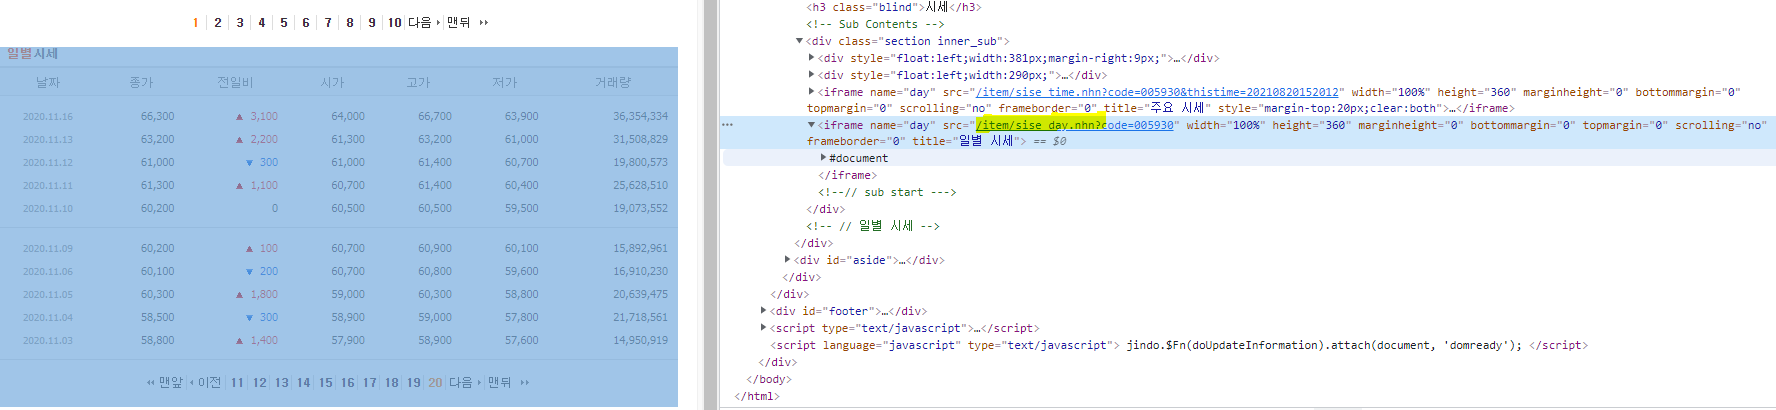

In [ ]:
# 네이버 금융 일별 시세 테이블 불러오기
# code = 회사 코드, page = 일별 시세 테이블의 페이지 수 (200 행의 데이터 불러오려면 20 페이지 입력)
df = pd.DataFrame()
for page in range(1,21):
  url = 'http://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)

  # url 주소로 GET 요청(request)
  res = requests.get(url, headers=header)

  # 서버에서는 그 요청을 받아 처리한 후 요청자인 나에게 응답(response) 줌
  # res.text로 응답을 주면 HTML 코드이기 때문에 read_html로 불러오기
  df = df.append(pd.read_html(res.text, header=0)[0], ignore_index=True)


# 결측 값 있는 행 제거
df = df.dropna()
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.08.23,73300.0,600.0,73300.0,74000.0,73000.0,19304365.0
2,2021.08.20,72700.0,400.0,73500.0,73900.0,72500.0,22364803.0
3,2021.08.19,73100.0,800.0,73500.0,74400.0,73100.0,22166298.0
4,2021.08.18,73900.0,300.0,73900.0,74600.0,73100.0,29192631.0
5,2021.08.17,74200.0,200.0,74000.0,75100.0,74000.0,30944847.0
...,...,...,...,...,...,...,...
294,2020.11.10,60200.0,0.0,60500.0,60500.0,59500.0,19073552.0
295,2020.11.09,60200.0,100.0,60700.0,60900.0,60100.0,15892961.0
296,2020.11.06,60100.0,200.0,60700.0,60800.0,59600.0,16910230.0
297,2020.11.05,60300.0,1800.0,59000.0,60300.0,58800.0,20639475.0


In [ ]:
#날짜 오름차순 정렬
df = df.sort_values(by=['날짜'], ascending=True)
print(df)

             날짜       종가     전일비       시가       고가       저가         거래량
298  2020.11.04  58500.0   300.0  58900.0  59000.0  57800.0  21718561.0
297  2020.11.05  60300.0  1800.0  59000.0  60300.0  58800.0  20639475.0
296  2020.11.06  60100.0   200.0  60700.0  60800.0  59600.0  16910230.0
295  2020.11.09  60200.0   100.0  60700.0  60900.0  60100.0  15892961.0
294  2020.11.10  60200.0     0.0  60500.0  60500.0  59500.0  19073552.0
..          ...      ...     ...      ...      ...      ...         ...
5    2021.08.17  74200.0   200.0  74000.0  75100.0  74000.0  30944847.0
4    2021.08.18  73900.0   300.0  73900.0  74600.0  73100.0  29192631.0
3    2021.08.19  73100.0   800.0  73500.0  74400.0  73100.0  22166298.0
2    2021.08.20  72700.0   400.0  73500.0  73900.0  72500.0  22364803.0
1    2021.08.23  73300.0   600.0  73300.0  74000.0  73000.0  19304365.0

[200 rows x 7 columns]


In [ ]:
dff = df[['종가', '시가', '고가', '저가', '거래량']].astype(int)
data = dff.values
print(data)

[[   58500    58900    59000    57800 21718561]
 [   60300    59000    60300    58800 20639475]
 [   60100    60700    60800    59600 16910230]
 [   60200    60700    60900    60100 15892961]
 [   60200    60500    60500    59500 19073552]
 [   61300    60700    61400    60400 25628510]
 [   61000    61000    61400    60700 19800573]
 [   63200    61300    63200    61000 31508829]
 [   66300    64000    66700    63900 36354334]
 [   65700    67000    67000    65600 30204089]
 [   64800    65700    66200    64700 22963790]
 [   64600    64100    64800    63900 16590290]
 [   64700    63900    65200    63900 15068682]
 [   67500    64800    67800    64700 27134398]
 [   67700    67900    69500    67000 32158235]
 [   66600    67900    68300    66500 32447065]
 [   68000    66100    68000    66000 19023323]
 [   68200    68000    68400    67600 14063434]
 [   66700    68400    68600    66700 43811016]
 [   67800    67100    68300    67100 22327173]
 [   69500    68400    69900    68300 29

## 투자 지표 불러오기

1. 아이투자 접속 https://www.itooza.com/
2. 종목 검색
3. 키보드 'F12' > 상단의 Network 메뉴 > Type은 All로 설정 
4. 검색 버튼 클릭 
5. 필요한 정보 : Header의 General메뉴의 Request URL
6. src = 'https://search.itooza.com/search.htm?seName=' 코드 복사
7. 완성된 코드 https://search.itooza.com/search.htm?seName={code}

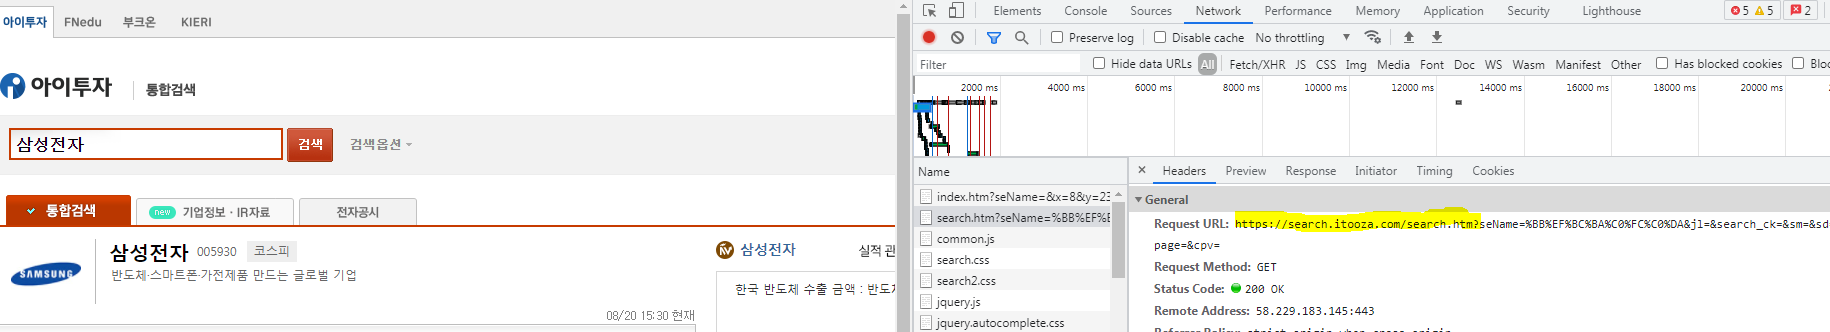

In [ ]:
df_indicator = pd.DataFrame()

url = 'https://search.itooza.com/search.htm?seName={code}'.format(code=code)

# 0: 2020년 12월 실적까지
# 1: 5년 단위 & 평균
# 2: 연환산 table
# 3: 연간 table
# 4: 분기별 table
page_num = 2


# ignore_index는 기존 index를 신경 쓰지 않고 연결
df_indicator = df_indicator.append(pd.read_html(url, header=0)[page_num], ignore_index=True)

df_indicator

,투자지표,21.06월,21.03월,20.12월,20.09월,20.06월,20.03월,19.12월,19.09월,19.06월,19.03월,18.12월,18.09월
0,"주당순이익(EPS,연결지배)",4749.00,4165.00,3841.00,3662.00,3196.00,3134.00,3166.00,3559.00,4431.00,5185.00,6016.00,6482.00
1,"주당순이익(EPS,개별)",3454.00,2629.00,2299.00,2166.00,2065.00,2145.00,2260.00,2576.00,3295.00,3800.00,4498.00,5006.00
2,PER (배),14.94,17.17,18.53,13.97,14.52,13.39,15.49,11.90,8.92,7.13,5.26,6.27
3,주당순자산(지분법),40361.00,39126.00,39406.00,39446.00,38534.00,38053.00,37528.00,37600.00,36789.00,36142.00,35342.00,32019.00
4,PBR (배),1.76,1.83,1.81,1.30,1.20,1.10,1.31,1.15,1.12,1.09,0.96,1.27
5,주당 배당금,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,시가 배당률 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ROE (%),11.77,10.65,9.75,9.28,8.29,8.24,8.44,9.63,12.59,15.23,18.28,20.29
8,순이익률 (%),12.52,11.46,11.02,10.58,9.43,9.12,9.33,10.71,13.49,15.87,18.00,18.99
9,영업이익률 (%),16.83,15.77,15.20,14.51,12.83,11.99,12.05,13.67,17.67,21.00,24.16,25.24
